In [7]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib

--- Metadata ---
{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach

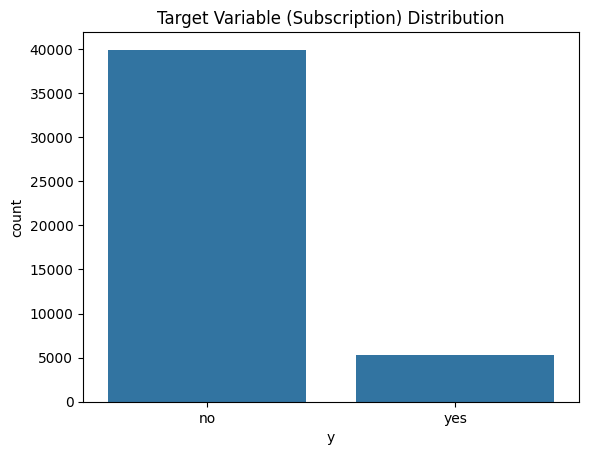

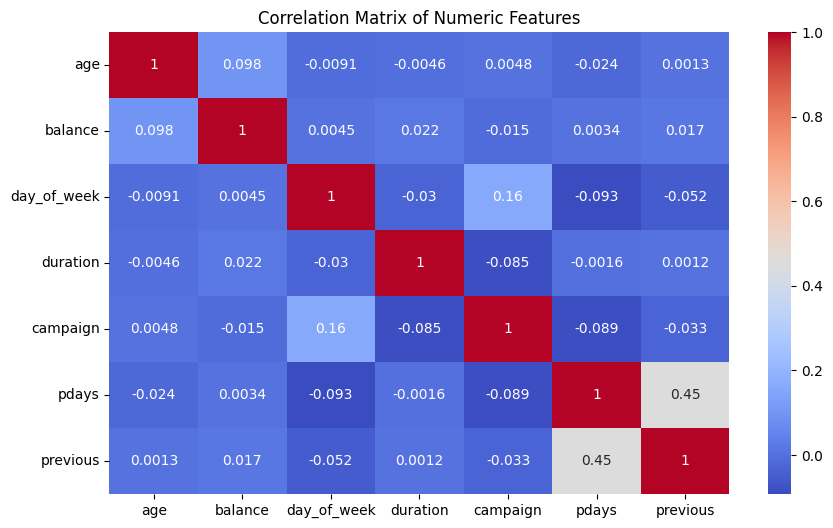

In [8]:
# 1. Fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 

# 2. Extract features and targets
X = bank_marketing.data.features 
y = bank_marketing.data.targets 

# 3. Initial Inspection for your Recording
print("--- Metadata ---")
print(bank_marketing.metadata) 
print("\n--- Variable Information ---")
print(bank_marketing.variables) 

# Combine temporarily for EDA (Exploratory Data Analysis)
eda_df = pd.concat([X, y], axis=1)

# Visualize target distribution
sns.countplot(x='y', data=eda_df)
plt.title('Target Variable (Subscription) Distribution')
plt.show()

# Visualize Correlation (Numeric only)
plt.figure(figsize=(10,6))
sns.heatmap(X.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib

# 1. Target Encoding (Safe Fix)
# 1. Convert y (DataFrame) to a flat Series of values
y_values = y.iloc[:, 0] if len(y.shape) > 1 else y.squeeze()

# 2. Apply the binary encoding (yes -> 1, no -> 0)
y_binary = y_values.apply(lambda x: 1 if x == 'yes' else 0)

# 3. Verify it worked (should show 0s and 1s)
print(y_binary.value_counts())
# 2. Identify Column Types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# 3. Create Preprocessor (Normalization + Encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# 4. Transform Data
X_processed = preprocessor.fit_transform(X)

# Convert back to DataFrame for easier handling
feature_names = (numeric_features + 
                 preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist())
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)

# 5. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y_binary, test_size=0.2, random_state=42)

# Save preprocessor
joblib.dump(preprocessor, '../artifacts/bank_preprocessor.joblib')
print("Preprocessing complete and artifact saved.")

y
0    45211
Name: count, dtype: int64
Preprocessing complete and artifact saved.
